# Diffusion processes on complex networks - assignment 1
### Mateusz Dzitkowski 249777

### Exercise 1
We are presented with an undirected network defined by a list of edges. The network drawn by me can be seen below

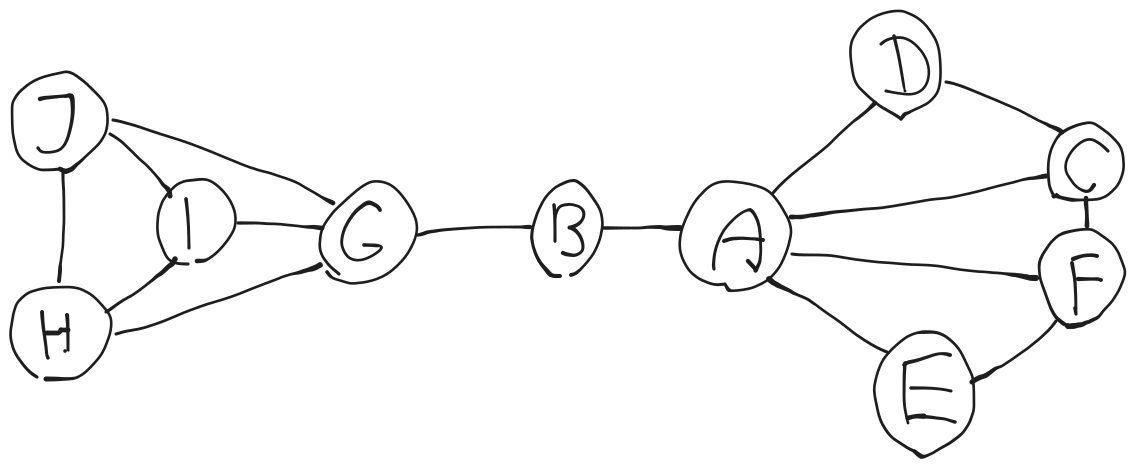

In [18]:
from IPython.display import SVG

SVG(filename="graph.svg")

Now we are tasked with computing some measures for this network:
- Number of nodes: 10, by inspection,
- Density:
    for an undirected graph it's $\frac{2|E|}{|V|(|V|-1)} = \frac{2 \cdot 15}{10 \cdot 9} = \frac{1}{3}$
- Each nodes degree - number of edges connected to a node, by inspection:
    - A: 5 - most central one
    - B: 2
    - C: 3
    - D: 2
    - E: 2
    - F: 3
    - G: 4
    - H: 3
    - I: 3
    - J: 3
- Each nodes clustering coefficient, given by $\frac{2T}{N(N-1)}$, where $T$ is the number of triangles that a node makes with its neighbours, and $N$ is the total number of its neighbours. We have
    - A: $\frac{2 \cdot 3}{5 \cdot 4} = \frac{3}{10}$
    - B: $\frac{2 \cdot 0}{2 \cdot 1} = 0$
    - C: $\frac{2 \cdot 2}{3 \cdot 2} = \frac{2}{3}$
    - D: $\frac{2 \cdot 1}{2 \cdot 1} = 1$
    - E: $\frac{2 \cdot 1}{2 \cdot 1} = 1$
    - F: $\frac{2 \cdot 2}{3 \cdot 2} = \frac{2}{3}$
    - G: $\frac{2 \cdot 3}{4 \cdot 3} = \frac{1}{2}$
    - H: $\frac{2 \cdot 3}{3 \cdot 2} = 1$
    - I: $\frac{2 \cdot 3}{3 \cdot 2} = 1$
    - J: $\frac{2 \cdot 3}{3 \cdot 2} = 1$
    with the average clustering of $0.71(3)$
- Each nodes closeness centrality, given by $\frac{N-1}{\sum_y d(x,y)}$, where $N$ is the number of nodes in the network, and $d(x, y)$ is the distance between $x$ and $y$. We have
    - A: $\frac{9}{16}$ - most central
    - B: $\frac{9}{16}$ - also most central
    - C: $\frac{9}{22}$
    - D: $\frac{9}{23}$
    - E: $\frac{9}{23}$
    - F: $\frac{9}{22}$
    - G: $\frac{9}{18} = \frac{1}{2}$
    - H: $\frac{9}{24} = \frac{3}{8}$
    - I: $\frac{9}{24} = \frac{3}{8}$
    - J: $\frac{9}{24} = \frac{3}{8}$
- Each nodes betweenness centrality, given by $\sum_{s \ne v \ne t}\frac{\sigma_{st}(v)}{\sigma_{st}}$, where $\sigma_{st}$ is the total number of shortest paths from $s$ to $t$, $\sigma_{st}(v)$ is the number of those paths that pass through $v$, and $v$ is the node in question.
    - I'm not willing to do that, and I know I will get some points deducted for that.

### Exercise 2
We are tasked to write a CSV representation of the network, then load it in a script, and use Networkx to plot it and calculate the same basic metrics.

In [19]:
import networkx as nx
from matplotlib import pyplot as plt
from pandas import DataFrame, read_csv


def from_csv(file_name: str) -> nx.Graph:
    data = read_csv(file_name)
    return nx.from_pandas_edgelist(data, create_using=nx.Graph())


def get_stats(graph: nx.Graph) -> DataFrame:
    data = DataFrame()
    data["degree"] = dict(nx.degree(graph))
    data["clustering"] = nx.clustering(graph)
    data["closeness"] = nx.closeness_centrality(graph)
    data["betweenness"] = nx.betweenness_centrality(graph)
    return data.sort_index()

In [20]:
g = from_csv("graph.csv")

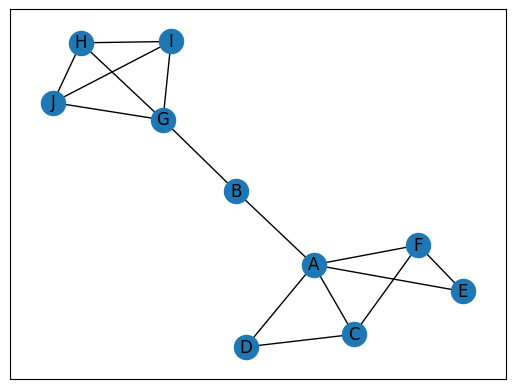

In [21]:
nx.draw_networkx(g, pos=nx.drawing.kamada_kawai_layout(g), arrows=False)
plt.show()

In [22]:
print(f"Number of nodes: {nx.number_of_nodes(g)}")
print(f"Density of the graph: {nx.density(g)}")
print("Graph measures")
print(get_stats(g))

Number of nodes: 10
Density of the graph: 0.3333333333333333
Graph measures
   degree  clustering  closeness  betweenness
A       5    0.300000   0.562500     0.611111
B       2    0.000000   0.562500     0.555556
C       3    0.666667   0.409091     0.013889
D       2    1.000000   0.391304     0.000000
E       2    1.000000   0.391304     0.000000
F       3    0.666667   0.409091     0.013889
G       4    0.500000   0.500000     0.500000
H       3    1.000000   0.375000     0.000000
I       3    1.000000   0.375000     0.000000
J       3    1.000000   0.375000     0.000000


We can see that the measures computed by hand match with the measures computed programatically.

### Exercise 3
We are tasked with writing expression for some basic measures of the graph using only the adjacency matrix $A$, and a vector $\vec{e} = (1, 1, \dots, 1)^T$. We have:
- $\vec{k} = A\vec{e}$
- $L = \vec{e}^TA\vec{e}$
- $N = A^2$
- $T = \frac{1}{6}tr(A^3)$
- Network is connected if all rows/columns have at least one $1$.